# **LINEAR REGRESSION WITH SCIKIT-LEARN**

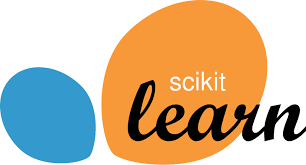



**`Scikit-Learn`** is an open source ML library written in Python. It is an integration of a wide range of state-of-the-art machine learning algorithms for many commercial applications, research-based projects and publications. 

The Scikit-Learn package covers four main aspects related to ML. These include data transformation, supervised learning, unsupervised learning, and model evaluation and selection strategies. 


Data transformation is a crucial step in all data analysis. There are common transformations (e.g., whitening  transformation, differencing, and log-odds ratios) frequently used for various input variables. Scikit-learn provides several convenient functions to perform these methods for data transformation and preprocessing. The core data structure used in almost all Scikit-learn functions is the *NumPy* array. The *independent variables* also known as *features* in the ML community, represented as $N_o \times N_f$ array with $N_o$ as the number of observations and $N_f$ as the number of features. The dependent variables, also referred to as *targets* or *labels*, are represented by an $N_o \times N_l$ array with $N_l$ representing the number of labels. In most of the applications for supervised learning, we are dealing with a single label with multiple values, so $N_l$ is equal to `one`. By convention, **`X`** is used to denote the feature array and **`y`** used to denote the label array. Detailed data preprocessing steps during data transformation are critically needed for accurate ML model build-up.
 

Let us get our hands dirty on some linear regression tasks using Scikit-learn and related modules.



We are going to make use of [California House Price](https://www.kaggle.com/datasets/shibumohapatra/house-price) dataset.



### **About Dataset**
**DESCRIPTION**

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

* **Problem Objective**:
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

* **Domain**: Finance and Housing

* **Analysis Tasks**:

1. We are to build a model of housing prices to predict median house values in California using the provided dataset.
2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.
3. Predict housing prices based on `median_income` as `dependent variable` and plot the regression chart for it.

#### Steps

* **Load the data** :

  * Read the “housing.csv” file from the folder into the program.
    
  * Print first few rows of this data.

 * Perform data exploration methods or summary methods, as they provide key insights about the dataset to help understand its structure and   characteristics.


* **Clean the dataset** :

  * We start with preliminary exploration and data quality analysis to clean and validate your data. While it is not strictly necessary to perform `uni-variate`, `bi-variate`, and `multi-variate` analyses before carrying out linear regression, it is a highly recommended best practice. These analyses provide better understand of the the dataset, check assumptions of linear regression, and improve the model’s interpretability and performance.


* **Encode categorical data** :

  * Convert categorical column in the dataset to numerical data (if any exists).


* **Split the dataset** :

  * Split the data into training and test sets, respectively.


* **Standardize data** :

  * Standardize training and test datasets if need be.


* **Perform Linear Regression** :

  * Perform Linear Regression on training data.

  * Predict output for test dataset using the fitted model.


* **Perform Model Validation** :

  * Use selected, but relevant model validation metrics to validate the model. This makes you hone in your statistics skills...


HINT: Import mean_squared_error from sklearn.metrics


* **Bonus exercise**: Perform Linear Regression with one independent variable :

  * Extract just the median_income column from the independent variables.

  * Perform Linear Regression to predict housing values based on median_income.

  * Predict output for test dataset using the fitted model.

  * Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

  

### **Step 1: Import the necessary libraries (modules)**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import statsmodels.api as sm
#from scipy import stats

%matplotlib inline

In [6]:
data = pd.read_csv("california_house_price.csv")

### **Step 2: Perform basic data inspection**

Here, we want to know the names of columns present in the dataset, the data types of each column, null and non-null counts, and number of entries. 


In [7]:
df = data.copy()

# Let us check the number and names of columns
print(f"\nThe shape number of rows and columns in the dataset is: {df.shape}" )
print("**********************************************************************************************")
print(f"The total number of columns in the dataset is {len(df.columns)}, and here are the columns: {df.columns}")


The shape number of rows and columns in the dataset is: (20640, 10)
**********************************************************************************************
The total number of columns in the dataset is 10, and here are the columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# Check for categorical columns

df.describe(include=["O"])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [12]:
# The categorical column contains 5 unique values. 
# We need to know what this consists of.
for column in df.select_dtypes(include=["object"]).columns:
    print(f"\nValue Counts for {column}:") 
    print(df[column].value_counts())


Value Counts for ocean_proximity:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


### **Insights** 


#### **1. Data Types and Non-null Counts:**
- The dataset contains **20640 entries** and **10 columns**.
- **Data Types**: There are 4 columns with `float64` data type, 5 columns with `int64` data type, and 1 column with `object` data type.
  - **Numerical Features**: These include features like `longitude`,`latitude`, `house_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, and `median_house_value`.
  - **Categorical Features**: `ocean_proximity` happens to be the only categorical feature in the dataset.

#### **2. Summary Statistics:**
- **Numerical Features**:
  - The target variable `median_house_value` has a mean of **$206855.816909** with a standard deviation of **$115395.615874**, indicating a significant spread in median house value. The standard deviation is a measure of how much the values in a data set deviate from the mean. In this case, the large standard deviation suggests that there is a considerable amount of variability in the data, meaning the values are spread out over a wide range.
  - `longitude` ranges from -124.35 to -114.31, with a mean of -118.49, indicating that the data points are relatively spread out over a geographical range. This spread suggests significant spatial variation in the data being analyzed, with the mean value suggesting a central tendency within the given range. The range and mean together indicate that the locations represented by these latitude values cover a broad area, possibly leading to diverse environmental, climatic, or demographic characteristics within the dataset.
  - `latitude` ranges from 41.95 to 32.54, with a mean of 34.26, indicating that the data points are distributed across a significant geographical span within these latitude coordinates. This range suggests that the data covers an area from the northern latitudes down to somewhat lower latitudes, potentially spanning diverse climatic, environmental, or demographic regions. The mean value of 34.26 shows a central tendency towards the lower end of this range, giving insight into the overall distribution and clustering of the data points. These coordinates of `longitude` and `latitudes` are within the western United States, specifically covering parts of California, Nevada, and Arizona as confirmed in the map.
  - `housing_median_age` ranges from 1 to 52 years, with a median age of 29 years. This information projects the presence of many old blocks of houses and relatively the presence of few new ones.
  - `total_rooms` ranges from 39320 to 2 rooms, with 1447.75 rooms as the median, indicating that within a specific location of longitude and latitude few to a thousand room spaces were discovered.
  - `total_bedrooms` ranges from 6445 bedrooms to 1 bedroom, with 435 bedrooms as the median, indicating that within a specific location of longitude and latitude few to a thousand bedrooms were discovered.
  - `population` ranges from a few units of people (3) to several thousands (35682), with a median of 409 people in a specific location governed by longitude and latitude degrees.
  - `households` ranges from 1 household to 6082 households, with a 409 households as the median, depending on the geographic location.
  - `median_income` ranges from $0.49990 to $15 within a block or geographical region. It may be in thousands. The median value is 3.5348.
  - `ocean_proximity`suggests the type of the landscape of the block with Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', and 'ISLAND'.
 

- **Categorical Feature—`ocean_proximity`**:
  - 9136 houses are situated <1H to the ocean (less than 1h from the ocean), 6551 houses are situated `inland`, 2658 houses are located `near the ocean`, 2290 houses are located `near the bay`, and 5 houses are on the `island`.

### **Step 3: Missing Value Analysis**

Here, we check whether there are missing values in the dataset or not.

In [13]:
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("\nNo missing values found in the dataset.")
else:
    print("\nMissing Values Count by Column:")
    print(missing_values[missing_values > 0])


Missing Values Count by Column:
total_bedrooms    207
dtype: int64



Visualizing Missing Values...


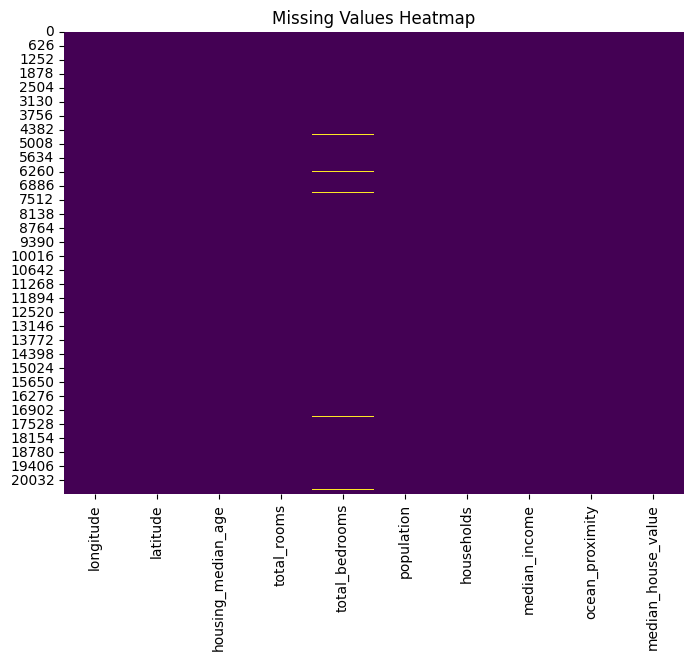

In [14]:
# let us visualize the dataset to further confirm the existence of missing values and where they are found.

if df.isnull().sum().sum() == 0:
    print("\nNo missing values to visualize.")
else:
    print("\nVisualizing Missing Values...")
    plt.figure(figsize = (8, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.show()

### **Insights into Missing Values** 

We want to use the heatmap to gain insights into missing data.

#### **1. Colors Representation:**
- **Yellow**: Represents missing values. The more yellow you see in a column, the more missing data is present in that particular feature.
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple indicate that most of the data is present for that feature.

#### **2. Identifying Columns with Missing Data:**
- Look for columns with visible color of yellow. These columns have a higher proportion of missing data.
  - For instance, in the heatmap, column like `total_bedrooms` has yellow markers, indicating that the feature has missing values. It contains about 1% void (null) entries.

#### **3. Understanding the Distribution of Missing Data:**
- **Randomly Distributed**: If for instance in cases where multiply columns have the yellow marks scattered around without any noticeable pattern, it suggests that the missing data might be randomly distributed.
- **Structured Missingness**: If the yellow is clustered in certain rows or columns, it might indicate a non-random pattern of missingness. For example, entire rows or columns missing could suggest a data collection issue or that these features are not applicable in certain cases.

#### **4. Assessing the Severity:**
- Columns with more yellow indicate a higher proportion of missing values, which might pose a problem for model building. This could lead to biased or inaccurate models if not handled properly. We have a case with `total_bedrooms`, indicating a substantial missingness.
  - In the heatmap, all the columns but `total_bedrooms` have no missing values.
  
  - Decisions will need to be made on whether to impute, drop, or handle these features differently.

### **Step 4: Distribution and Variable Relationships—The Multivariate Analysis**

Multivariate analysis is a statistical approach used to understand the relationships between three or more variables simultaneously. It is an extension of bivariate analysis (which examines two variables) and is essential for analyzing complex data sets. Multivariate analysis helps in identifying patterns, relationships, and structures that would not be apparent when examining variables individually.

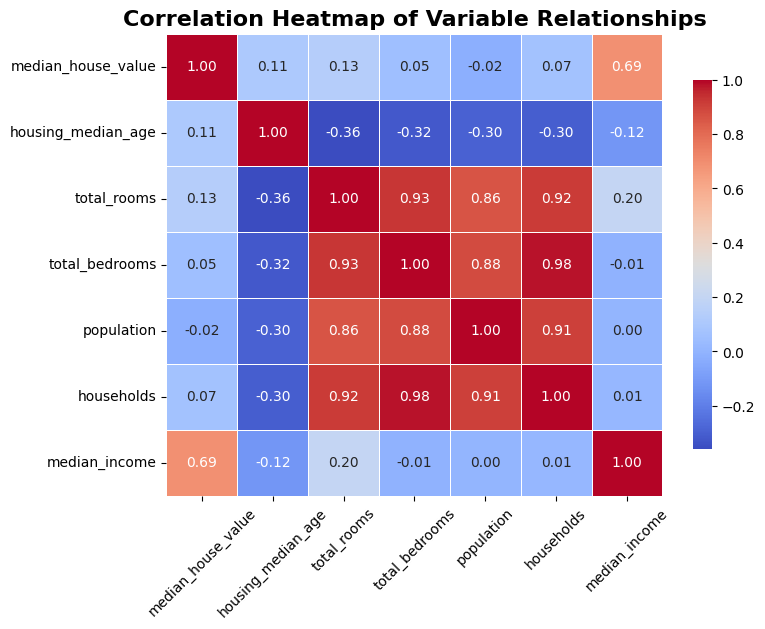

In [16]:
# Visualize using heatmap for numerical insights
feature_columns = ['median_house_value', 'housing_median_age', 
                   'total_rooms', 'total_bedrooms', 
                   'population', 'households', 'median_income']

# Ensure 'selected_features' exists in the DataFrame
selected_features = df[feature_columns]

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    selected_features.corr(),  # Compute correlation matrix
    annot=True,                # Display correlation values
    fmt=".2f",                 # Format numbers
    cmap="coolwarm",           # Colormap
    linewidths=0.5,            # Linewidth between cells
    cbar_kws={"shrink": 0.8}   # Shrink color bar
)
plt.title("Correlation Heatmap of Variable Relationships", fontsize=16, fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

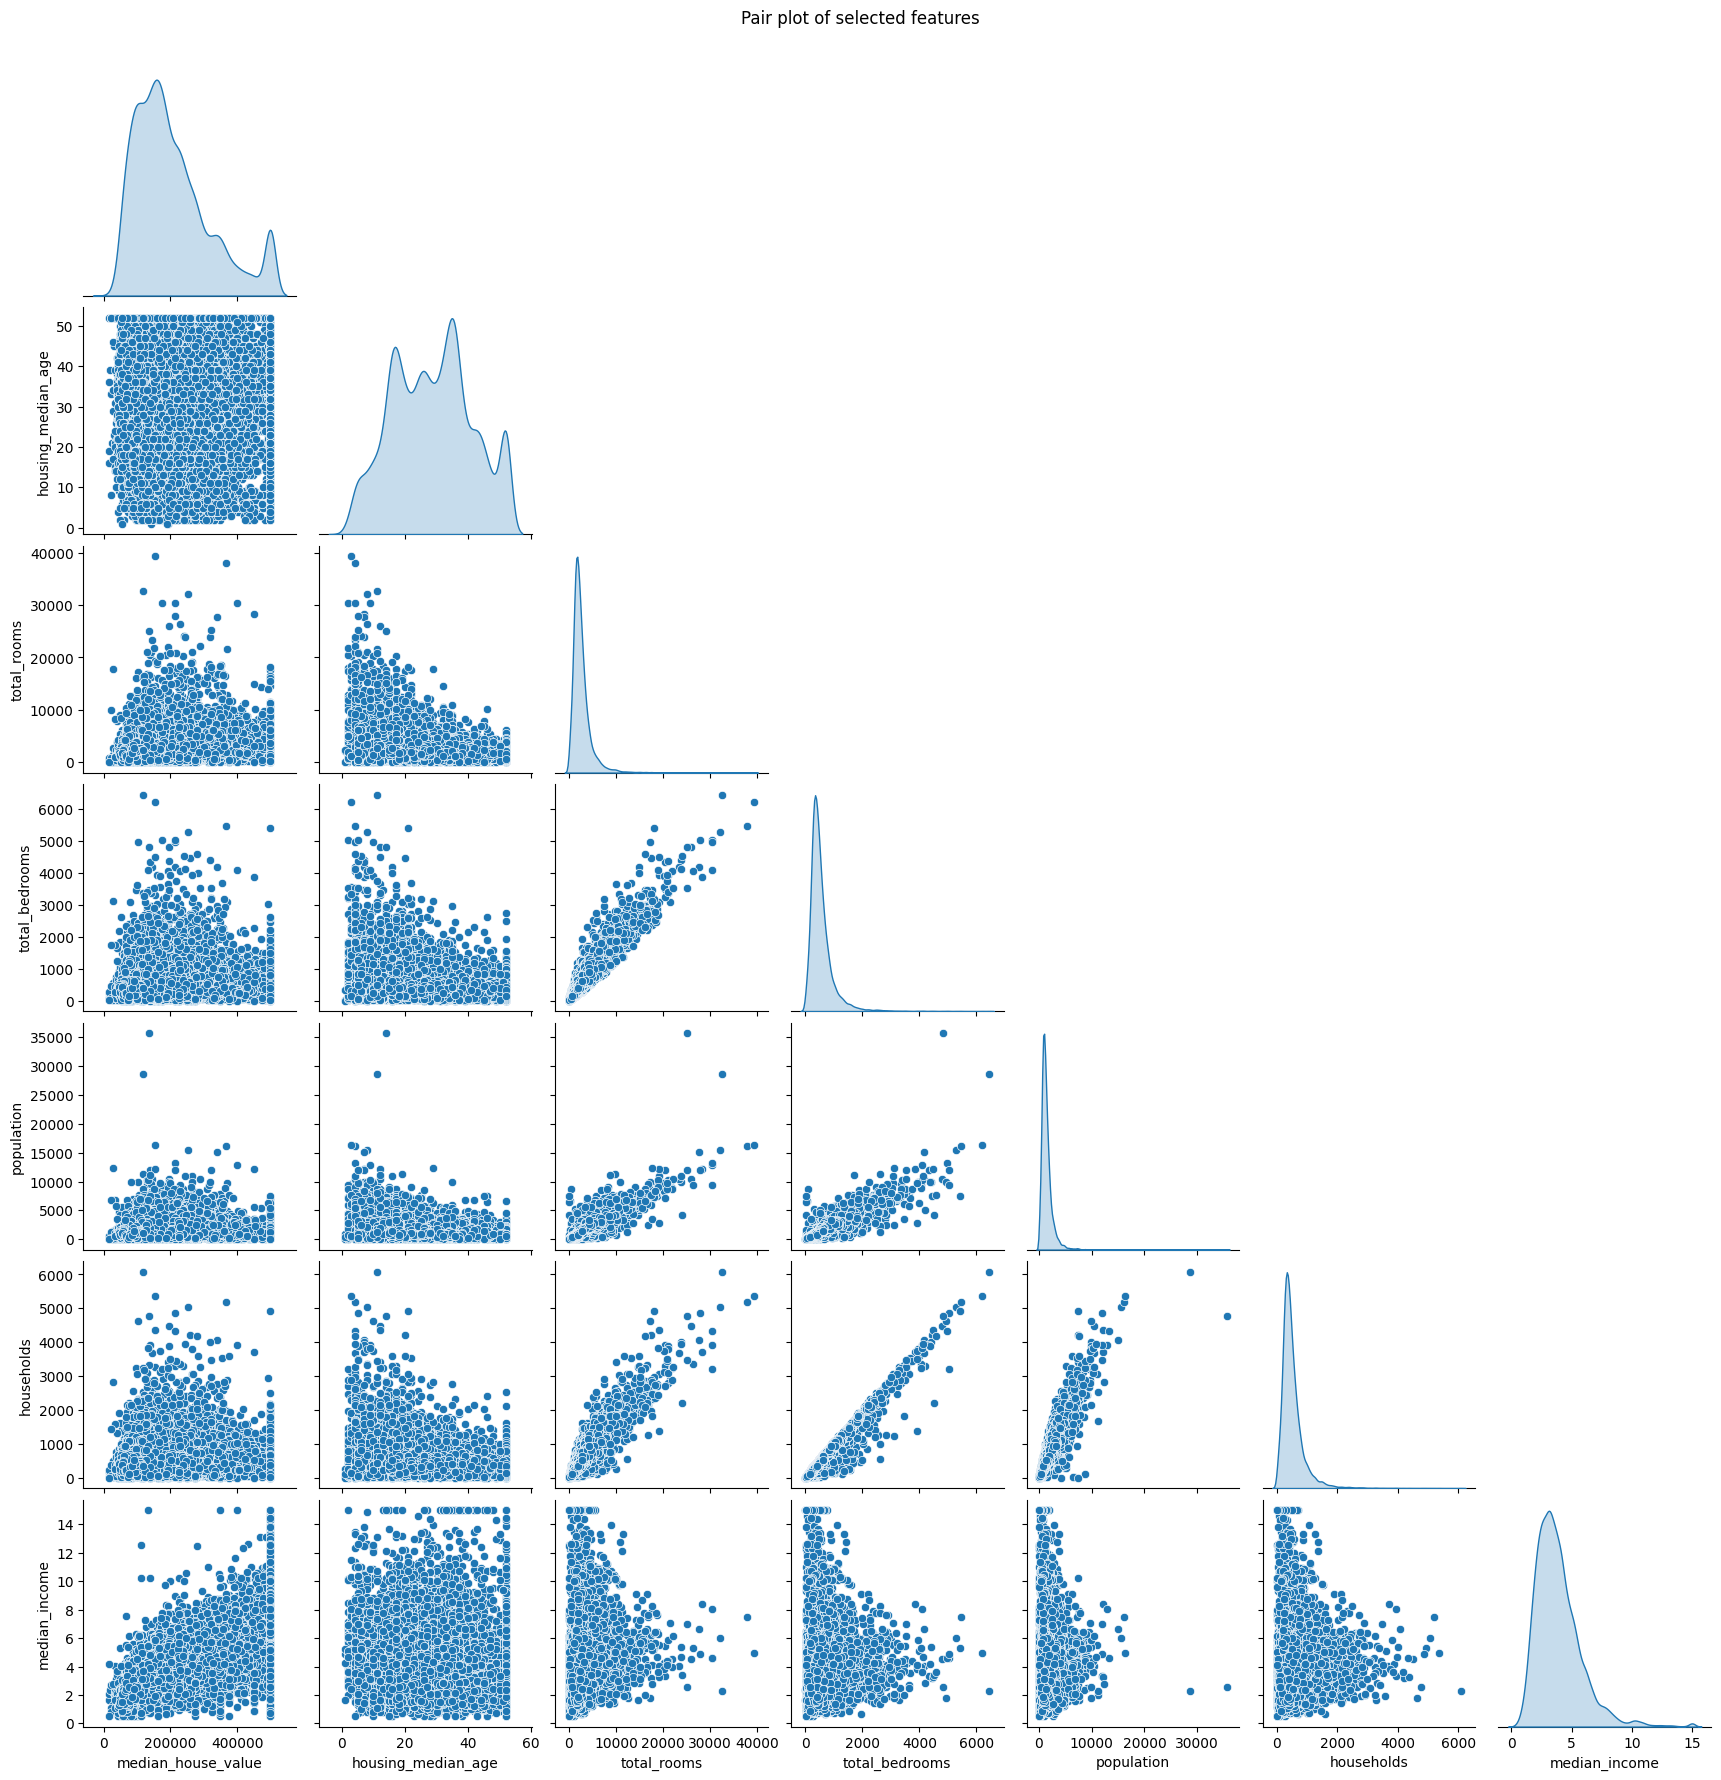

In [17]:
# Visualize using paired plot for more detailed insight

sns.pairplot(selected_features,
             diag_kind = 'kde',
             corner = True
             )
plt.suptitle("Pair plot of selected features", y = 1.02)
plt.show()

**Observations from the Heat Map and Pair Plot**


1. **`Diagonal`: Distribution of Individual Features**

Each diagonal subplot shows the distribution of individual features using kernel density estimates:
`median_house_value`: 
Skewed distribution; most house values are concentrated at a lower range with some higher outliers.

`housing_median_age`: 
Likely bimodal, suggesting two distinct clusters of housing ages.

`median_income`: 
Positively skewed, with most values concentrated in lower income ranges.

`total_rooms`, `total_bedrooms`, `population`, and `households`: 
All show heavily skewed distributions with a small number of very large values.

2. **`Off-Diagonal`: Pairwise Relationships**

* Strong Positive Correlations:
`total_rooms` vs. `households` and `population`:
Clear positive linear relationships, indicating that regions with more rooms also have more households and larger populations.

`households` vs. `population`:
High correlation, as expected, because larger populations tend to mean more households.


* Weak Relationships:

`median_house_value` vs. `total_rooms`, `total_bedrooms`, `population`, and `households`:
Scattered plots with no clear linear trend, suggesting a weak direct relationship between house value and these features.

`housing_median_age` vs. `total_rooms`, `total_bedrooms`, and `population`:
Little visible correlation.


* Significant Relationship:

`median_house_value` vs. `median_income`:
Positive correlation, with higher median incomes generally associated with higher house values. However, the relationship may not be perfectly linear.



3. **`Overall Patterns and Insights`**
* Key Driver of House Value:

`median_income` appears to be a strong predictor of `median_house_value`, while other variables like `total_rooms` and `population` have weaker relationships.


* Outliers:

Some features (e.g., `total_rooms` and `population`) have extreme values that may disproportionately influence their distributions and relationships.

* Clusters:

For features like `housing_median_age`, distinct clusters may indicate differences in neighborhood characteristics or housing markets.

* Skewed Features:

Skewness in features like `total_rooms`, `population`, and `median_income` may require transformation (e.g., logarithmic) for effective modeling.

### **Step 5: Feature Engineering**

* **Removing Missing Values**

As we observed, `total_bedrooms` column had 207 missing values. 

There are several ways of handling missing values such as:
1. Remove missing values
2. impute missing values with a constant
3. impute missing values with mean, median, or mode
4. forward or backward fill
5. interpolate missing values
6. custom function for imputation
7. use machine learning models


We are going to impute missing values with the `median` value of the `total_bedrooms` column because of its robustness to outliers and skewed. It also preserves data characteristics by ensuring that the imputed value aligns well with the existing data distribution.


Visualizing Missing Values for just the total_bedrooms column...


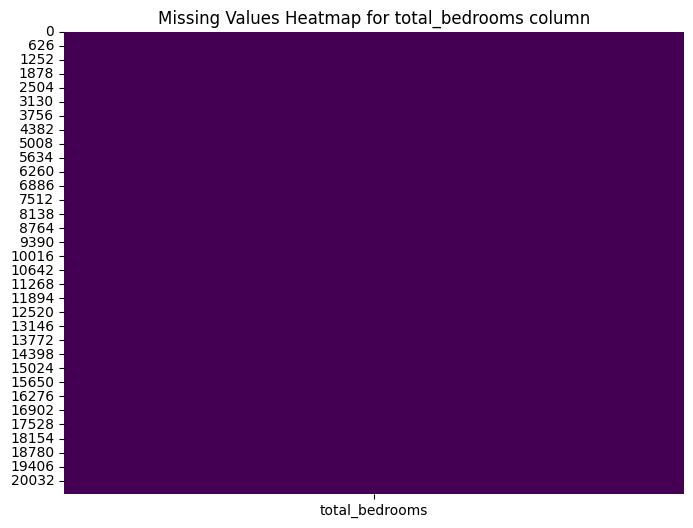

In [18]:
# Fill with median value

df = df.fillna(df['total_bedrooms'].median())

# Visualize the whole dataset

print("\nVisualizing Missing Values for just the total_bedrooms column...")
plt.figure(figsize = (8, 6))
sns.heatmap(df[["total_bedrooms"]].isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap for total_bedrooms column")
plt.show()

There are no more missing values in the `total_bedrooms` column.

* **Feature Selection**

Feature selection is the process of identifying and selecting the most relevant features (variables, predictors) from a dataset that contribute the most to the predictive power of a model. This step is crucial for improving model performance, reducing overfitting, and simplifying the model's interpretation.


There several types of techniques utilized to evaluate the importance of features based in their statistical properties, independent of any specific ML model. One of such techniques is the correlation matrix. We will use this method to remove features with low correlation coefficient to the target variable or high correlation with each other. Mere visualization points to `median_income` having a stronger correlation with `median_house_value` (correlation coefficient = 0.69). Hence `median_income` is a strong predictor or `median_house_value`. Therefore, a single variable linear regression is ideal to further analyze the relationship between the predictor and target.

### **Step 6: Regression**
The equation for a single variable linear regression is:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

where:

$\beta_0$ is the y-intercept, $\beta_1$ is the slope of the regression, $\epsilon$ is the error term, y is the dependent variable (target), x is the independent variable (predictor)



* **Select Relevant Columns and Split Data**

In [20]:
# select predictor (X) and target (y) columns
X = df[['median_income']]
y = df['median_house_value']



# Split data into train and test sets, with 30% of the data reserved as test set.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



#X_train: Training feature data.
#X_test: Testing feature data.
#y_train: Training labels.
#y_test: Testing labels.

* **Model Training**



We create `model` object to initialize an instance of the `LinearRegression` class from `scikit-learn`. Then use the `model` object to call the `fit` method from `LinearRegression` class to fit (train) the linear regression model to the training data `X_train` and `y_train`. During this process, the model learns the relationship between the input feature(s) (`X_train`) and the target values (`y_train`) by finding the best-fit line.

The algorithm uses the least squares method to minimize the sum of squared residuals (differences between actual and predicted values):

$$ Residual = 𝑦_\text{actual}  −  𝑦_\text{predicted}  $$

 
It adjusts the model parameters ($\beta_0$ and $\beta_1$) to minimize the error.

The `fit()` function stores the learned coefficient(s) and intercept internally within the `model` object. Items stored can be accessed using `model.coef_` for model coefficients, and `model.intercept_` for the intercept.

In [21]:
# Train the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
# Model coefficients
B1 = model.coef_[0] # coefficient (slope)
B0 = model.intercept_ # intercept
print(f" The model equation is: y = {B0:.2f} + {B1:.2f}x")

 The model equation is: y = 44459.73 + 41933.85x


In [23]:
# Predictions
y_pred = model.predict(X_test)

* **Model Validation**
The model is to be validated using several metrics such as `mean_absolute_error`, `mean_absolute_error`, and `r2_score`

In [24]:
# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 7091157771.77
Mean Absolute Error (MAE): 62990.87
R-squared (R2): 0.46


* **Plot Regression Line**

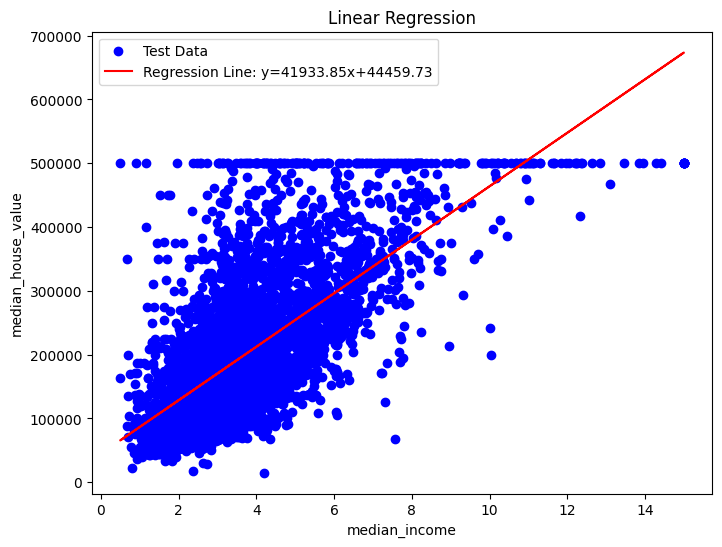

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label=f'Regression Line: y={B1:.2f}x+{B0:.2f}')
plt.title("Linear Regression")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.legend()
plt.show()

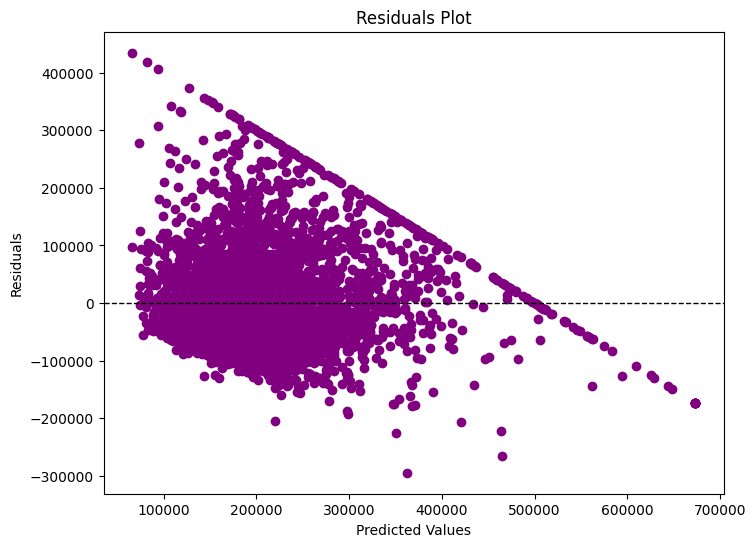

In [26]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

### **Interactive Session**

What can you deduce from the:
1. Model validation metrics?
2. Regression plot?


What do you suggest?

### **Conclusion**
A linear regression model was trained to predict `median_house_value` using a single variable, `median_income` using `California Housing` dataset. One column contained missing values, which was handled using the median of the column values. The `r2_score` value of 0.42 indicated that the model preformed poorly owing to the chain influence of other variables and weak relationship between `median_income` and `median_house_value` observed from the `heat map` even though the `median_income` was a better predictor on a single-variable predictor basis. Furthermore, the error terms ($\epsilon$) are high, indicating poor fit as model terms are far from actual values.